In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot


In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)


In [3]:
# number of input columns
n_inputs = X.shape[1]


In [4]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [5]:
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


In [6]:
# define encoder
visible = Input(shape=(n_inputs,))


In [7]:
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)


In [8]:
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)


In [9]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)


In [10]:
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)


In [11]:
# output layer
output = Dense(n_inputs, activation='linear')(d)


In [12]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)


In [13]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')


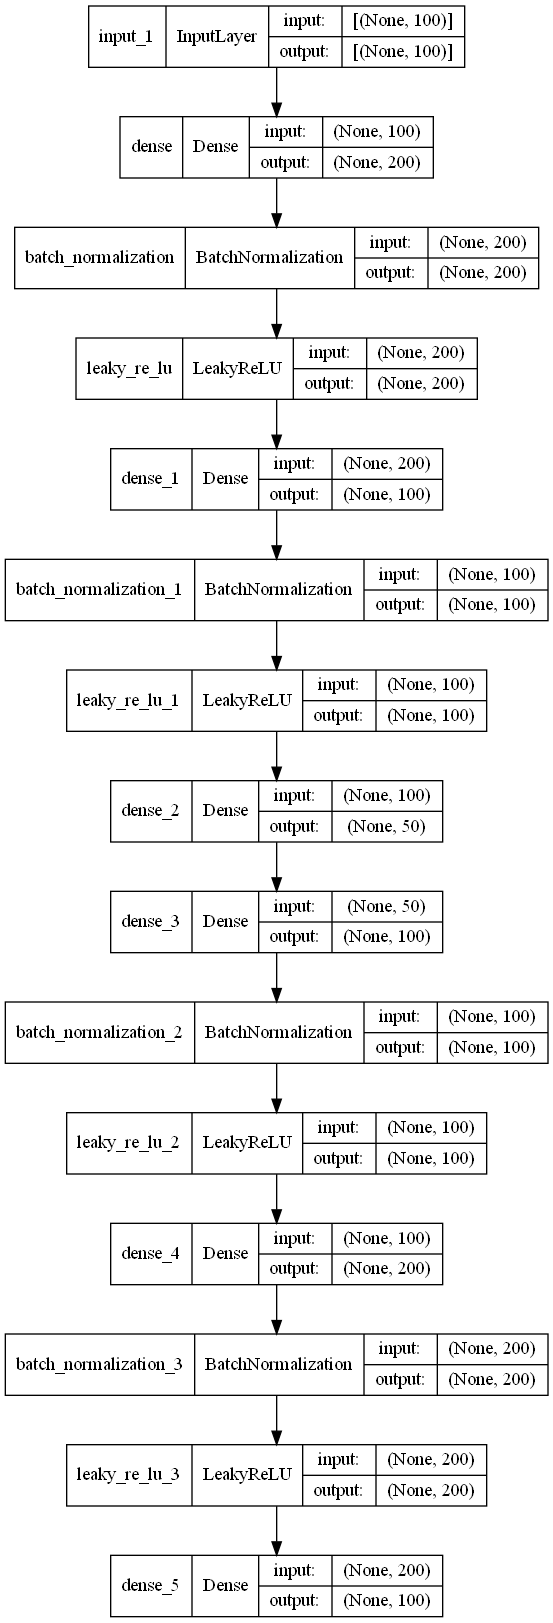

In [14]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)


In [15]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))


Epoch 1/200
42/42 - 2s - loss: 0.2427 - val_loss: 0.1954 - 2s/epoch - 45ms/step
Epoch 2/200
42/42 - 0s - loss: 0.0409 - val_loss: 0.1099 - 237ms/epoch - 6ms/step
Epoch 3/200
42/42 - 0s - loss: 0.0273 - val_loss: 0.0570 - 247ms/epoch - 6ms/step
Epoch 4/200
42/42 - 0s - loss: 0.0220 - val_loss: 0.0325 - 270ms/epoch - 6ms/step
Epoch 5/200
42/42 - 0s - loss: 0.0184 - val_loss: 0.0196 - 239ms/epoch - 6ms/step
Epoch 6/200
42/42 - 0s - loss: 0.0156 - val_loss: 0.0151 - 247ms/epoch - 6ms/step
Epoch 7/200
42/42 - 0s - loss: 0.0142 - val_loss: 0.0116 - 246ms/epoch - 6ms/step
Epoch 8/200
42/42 - 0s - loss: 0.0129 - val_loss: 0.0092 - 241ms/epoch - 6ms/step
Epoch 9/200
42/42 - 0s - loss: 0.0123 - val_loss: 0.0092 - 246ms/epoch - 6ms/step
Epoch 10/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0070 - 242ms/epoch - 6ms/step
Epoch 11/200
42/42 - 0s - loss: 0.0107 - val_loss: 0.0066 - 222ms/epoch - 5ms/step
Epoch 12/200
42/42 - 0s - loss: 0.0102 - val_loss: 0.0067 - 254ms/epoch - 6ms/step
Epoch 13/200
42

Epoch 100/200
42/42 - 0s - loss: 0.0044 - val_loss: 0.0022 - 232ms/epoch - 6ms/step
Epoch 101/200
42/42 - 0s - loss: 0.0045 - val_loss: 0.0020 - 304ms/epoch - 7ms/step
Epoch 102/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0023 - 282ms/epoch - 7ms/step
Epoch 103/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0025 - 249ms/epoch - 6ms/step
Epoch 104/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0023 - 285ms/epoch - 7ms/step
Epoch 105/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0017 - 267ms/epoch - 6ms/step
Epoch 106/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0020 - 231ms/epoch - 5ms/step
Epoch 107/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0017 - 267ms/epoch - 6ms/step
Epoch 108/200
42/42 - 0s - loss: 0.0042 - val_loss: 0.0020 - 252ms/epoch - 6ms/step
Epoch 109/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0025 - 252ms/epoch - 6ms/step
Epoch 110/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0023 - 277ms/epoch - 7ms/step
Epoch 111/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0018 - 242ms/epoch - 6

Epoch 198/200
42/42 - 0s - loss: 0.0031 - val_loss: 0.0012 - 244ms/epoch - 6ms/step
Epoch 199/200
42/42 - 0s - loss: 0.0032 - val_loss: 0.0011 - 301ms/epoch - 7ms/step
Epoch 200/200
42/42 - 0s - loss: 0.0027 - val_loss: 0.0012 - 257ms/epoch - 6ms/step


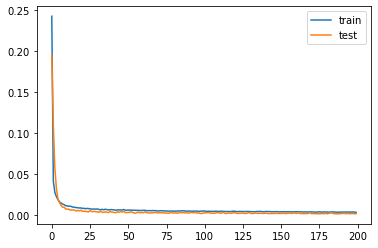

In [16]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


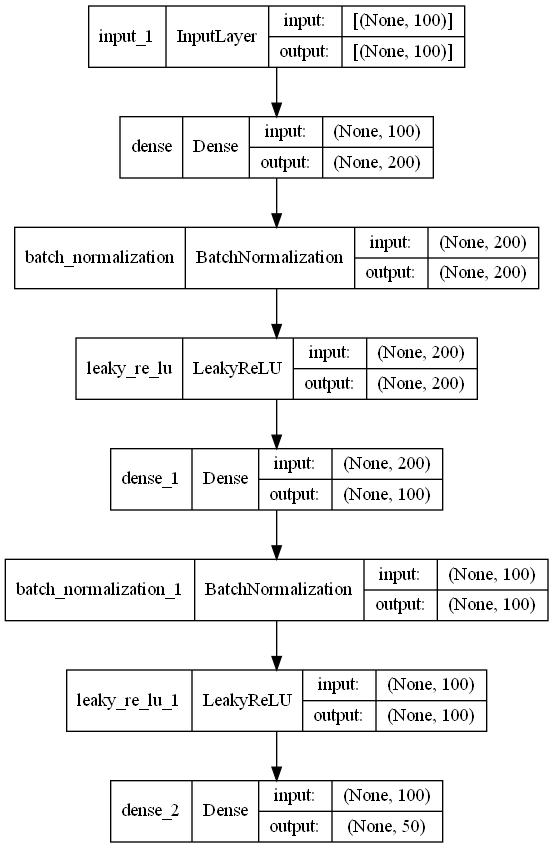

In [17]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
